# Chapter 10: Sensory Delay

<img src="SD_fig_01.png" alt="title" width="600px" />

## Motivation

**Sensory delay**: time delay between when an agent receives a signal and when it reacts to it.

Important parameter in many real systems. 

Can be intrinsic, can be intentionally added to engineer a desired system behavior. 

**Key advantages**:
- Can be intrinsic, can be intentionally added to engineer a desired system behavior.
- Tuning the delay allows to switch between different collective phases.


### Applications

**Physics and Artificial systems**
- Control and engineer of the collective behaviour of a system of agents.
- Tune between self-assembly and dispersal

**Biology**
- Understanding of the behaviour of real systems


## Application example: Engineering Sensorial Delay to Control Phototaxis and Emergent Collective Behaviors

[Engineering Sensorial Delay to Control Phototaxis and Emergent Collective Behaviors](https://journals.aps.org/prx/abstract/10.1103/PhysRevX.6.011008)

<img src="SD_fig_02.png" alt="title" width="600px" />

## Light-sensitive robot

Position and orientation: $x$, $y$, $\phi$

$v$: self-propulsion speed. Depends on the light intensity $I$ (external parameter).

$$
v = v (I) 
$$

Velocity: $\mathbf{v} = (v \cos{\phi}) \, \hat{\mathbf{x}} + (v \sin{\phi})\, \hat{\mathbf{y}}$

Noise: affects the orientation only.



**Equation of motion:**

$$
    \left\{ 
    \begin{array}{rcl}
        \displaystyle \frac{{\rm d}x(t)}{{\rm d}t}  &  =  & v \cos{\phi (t)} 
        \\[10pt]
        \displaystyle \frac{{\rm d}y(t)}{{\rm d}t}  &  =  & v \sin{\phi (t)} 
        \\[10pt]
        \displaystyle \frac{{\rm d}\phi(t)}{{\rm d}t} & =  & \sqrt{\frac{2}{\tau}}\,W_{\phi} 
    \end{array}
    \right.
$$


$W_{\phi}$: white noise. 

$\tau$: characteristic timescale of the rotational diffusion.

## Simulation of a light-sensitive robot

Let's simulate a light sensitive robot. 

We consider a dependence $v(I)$ such as:

$$
v (I) = v_{\rm inf} + (v_{0} - v_{\rm inf})\, \exp{(-I / I_{\rm c})}
$$

$v_0$ : speed when $I=0$ (absence of background light)

$v_{\rm inf}$ : speed when $I=+\infty$ (limit of infinite light intensity)

$I_{\rm c}$ : intensity where the speed from $v_0$ drops to $v_0 / e$

<img src="SD_fig_03.png" alt="title" width="600px" />

Function implementing the light-sentitive robot in a Gaussian light intensity zone.

We consider a Gaussian light intensity zone:

$$
  I(x, y) = I_{0} \, \exp{\left(- \frac{x^2 + y^2}{r_0^2} \right)}
$$

In [1]:
import math
import numpy as np 

def evolution_GI(x0, y0, phi0, v_inf, v0, Ic, I0, r0, tau, dt, duration):
    """
    Function to generate the trajectory of a light-sensitive robot in a Gaussian
    light intensity zone.
    
    Parameters
    ==========
    x0, y0 : Initial position [m].
    phi0 : Initial orientation [rad].
    v_inf : Self-propulsion speed at I=0 [m/s]
    v0 : Self-propulsion speed at I=I0 [m/s]
    Ic : Intensity scale over which the speed decays.
    I0 : Maximum intensity.
    r0 : Standard deviation of the Gaussian intensity.
    tau : Time scale of the rotational diffusion coefficient [s]
    dt : Time step for the numerical solution [s].
    duration : Total time for which the solution is computed [s].
    """
        
    # Coefficients for the finite difference solution.
    c_noise_phi = np.sqrt(2 / tau * dt)

    N = math.ceil(duration / dt)  # Number of time steps.

    x = np.zeros(N)
    y = np.zeros(N)
    phi = np.zeros(N)

    rn = np.random.normal(0, 1, N - 1)
    
    x[0] = x0
    y[0] = y0
    phi[0] = phi0

    for i in range(N - 1):
        I =  I0 * np.exp(- (x[i] ** 2 + y[i] ** 2) / r0 ** 2)
        v = v_inf + (v0 - v_inf) * np.exp(- I / Ic) 
        x[i + 1] = x[i] + v * dt * np.cos(phi[i])
        y[i + 1] = y[i] + v * dt * np.sin(phi[i])
        phi[i + 1] = phi[i] + c_noise_phi * rn[i]

    return x, y, phi

Let's simulate a light-sensitive robot.

In [2]:
# Simulation of a light-sensitive robot. No delay.

tau = 1  # Timescale of the orientation diffusion.
dt = 0.01  # Time step [s].
duration = 300  # Total time [s].

v0 = 0.1  # Self-propulsion speed at I=0 [m/s].
v_inf = 0.01  # Self-propulsion speed at I=+infty [m/s].
Ic = 0.1  # Intensity scale where the speed decays.
I0 = 1  # Maximum intensity.
r0 = 0.3  # Standard deviation of the Gaussian light intensity zone [m].

x0 = 0  # Initial position [m].
y0 = 0  # Initial position [m].
phi0 = 0  # Initial orientation [rad].

x, y, phi = evolution_GI(x0, y0, phi0, v_inf, v0, Ic, I0, r0, tau, dt, duration)

t = dt * np.arange(math.ceil(duration / dt))

Let's plot the trajectory in the Cartesian plane.

We will plot also the background intensity as a reference.

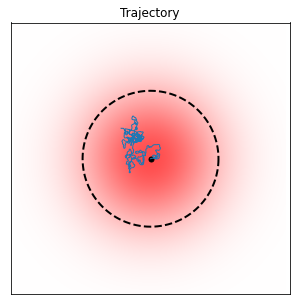

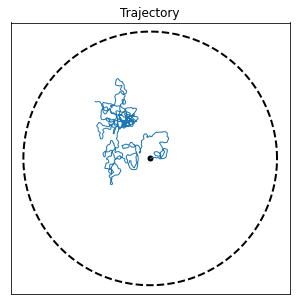

In [5]:
from matplotlib import pyplot as plt

# Generate the Gaussian intensity background image.
L = 2 * r0  # Define square size to represent in the image. 
dx = 0.01 * r0  # Define pixel size.
dy = 0.01 * r0
x_lin = np.arange(- L, L + 0.01 * r0, dx)  # x coordinates.
y_lin = np.arange(- L, L + 0.01 * r0, dy)  # y coordinates.
x_coo, y_coo = np.meshgrid(x_lin, y_lin)  # x-y grid.
I_bg = np.exp( -(x_coo ** 2 + y_coo ** 2) / r0 ** 2)
Lx, Ly = I_bg.shape  # Image shape.
ratio = Lx / L / 2 # Meters to pixels conversion ratio.

def convert2RBG(I_profile, RGB0, RGB1):
    """
    Function to convert the 2 dimensional numpy array into a RGB image.
    
    Parameters
    ==========
    I_profile : Intensity profile.
    RGB0 : Components R, G, B of the chosen color shade for minimum I_profile.
    RGB1 : Components R, G, B of the chosen color shade for maximum I_profile.
    """
    
    [n_rows, n_cols] = I_profile.shape
    
    I_RGB = np.zeros([n_rows, n_cols, 3])
    
    # Set I_profile between 0 and 1
    I_profile -= np.amin(I_profile)    
    I_profile /= np.amax(I_profile)  
    
    for c in range(3):
        I_RGB[:, :, c] = I_profile * RGB1[c] + (1 - I_profile) * RGB0[c]

    return I_RGB

# Create the image of the intensity profile.
RGB0 = [1.0, 1.0, 1.0]  # White. Color for I=0.
RGB1 = [1.0, 0.3, 0.3]  # Bright red. Color for I=I0.
I_profile = convert2RBG(I_bg, RGB0, RGB1)


# Plot intensity profile and trajectory.
plt.figure(figsize=(5, 5))
plt.imshow(I_profile)  # Plot intensity profile.
# Plot a reference circle with radius r0.
plt.plot(Lx / 2 + r0 * ratio * np.cos(2 * np.pi * np.arange(361) / 360),
        Ly / 2 + r0 * ratio * np.sin(2 * np.pi * np.arange(361) / 360),
        '--', color='k', linewidth=2)
# Plot a reference point in the origin.
plt.plot(Lx / 2, Ly / 2, '.', color='k', markersize=10)
# Plot the trajectory properly rescaled and shifted.
plt.plot(x * ratio + Lx / 2, - y * ratio + Ly / 2, '-', linewidth=1 ) 
plt.title('Trajectory')
plt.axis('equal')
plt.xticks([]) 
plt.yticks([]) 
plt.show()       



# Plot intensity profile and trajectory.
plt.figure(figsize=(5, 5))
# Plot a reference circle with radius r0.
plt.plot(r0 * np.cos(2 * np.pi * np.arange(361) / 360),
        r0 * np.sin(2 * np.pi * np.arange(361) / 360),
        '--', color='k', linewidth=2)
# Plot a reference point in the origin.
plt.plot(0, 0, '.', color='k', markersize=10)
# Plot the trajectory.
plt.plot(x, y, '-', linewidth=1 ) 
plt.title('Trajectory')
plt.axis('equal')
plt.xticks([]) 
plt.yticks([]) 
plt.show()       






## Delay

Let's introduce a delay. It can be positive or negative.

<img src="SD_fig_04.png" alt="title" width="600px" />

We start by simulating the behaviour in the presence of a positive delay $\delta$:

$$
    v(t, \delta) = v(I(t - \delta))
$$

In the specific:

$$
  I(t - \delta) = I(x(t - \delta), y(t - \delta)) = I_{0} \, \exp{\left(- \frac{\lbrack x(t - \delta) \rbrack ^2 + \lbrack y(t - \delta) \rbrack ^2}{r_0^2} \right)}
$$



### Positive delay

Function implementing the light-sentitive robot in a Gaussian light intensity zone with **positive delay** $\delta$.

We will always measure $\delta$ in unit of $\tau$ (time scale of reorientation). 

When simulating with finite differences, we will also express the delay $\delta$ in terms of finite timesteps $\Delta t$.

In [6]:
def evolution_GI_posdelay(x0, y0, phi0, v_inf, v0, Ic, I0, r0, tau, dt, duration, delta):
    """
    Function to generate the trajectory of a light-sensitive robot in a Gaussian
    light intensity zone with positive delay.
    
    Parameters
    ==========
    x0, y0 : Initial position [m].
    phi0 : Initial orientation [rad].
    v_inf : Self-propulsion speed at I=0 [m/s]
    v0 : Self-propulsion speed at I=I0 [m/s]
    Ic : Intensity scale over which the speed decays.
    I0 : Maximum intensity.
    r0 : Standard deviation of the Gaussian intensity.
    tau : Time scale of the rotational diffusion coefficient [s]
    dt : Time step for the numerical solution [s].
    duration : Total time for which the solution is computed [s].
    delta : Positive delay [s].
    """
        
    # Coefficients for the finite difference solution.
    c_noise_phi = np.sqrt(2 / tau * dt)

    N = math.ceil(duration / dt)  # Number of time steps.

    x = np.zeros(N)
    y = np.zeros(N)
    phi = np.zeros(N)
    
    n_delay = int(delta / dt)  # Delay in units of time steps.

    rn = np.random.normal(0, 1, N - 1)
    
    x[0] = x0
    y[0] = y0
    phi[0] = phi0
    I_ref = I0 * np.exp(- (x0 ** 2 + y0 ** 2) / r0 ** 2)

    for i in range(N - 1):
        if i < n_delay:
            I = I_ref
        else:
            I = I0 * np.exp(- (x[i - n_delay] ** 2 + y[i - n_delay] ** 2) / r0 ** 2)
        
        v = v_inf + (v0 - v_inf) * np.exp(- I / Ic) 
        x[i + 1] = x[i] + v * dt * np.cos(phi[i])
        y[i + 1] = y[i] + v * dt * np.sin(phi[i])
        phi[i + 1] = phi[i] + c_noise_phi * rn[i]

    return x, y, phi

Let's simulate with positive delay.

In [9]:
delta = 5 * tau  # Positive delay [s].

xp, yp, phip = evolution_GI_posdelay(x0, y0, phi0, v_inf, v0, Ic, I0, r0, tau, dt, 
                                  duration, delta)

t = dt * np.arange(math.ceil(duration / dt))



Plot the trajectories.

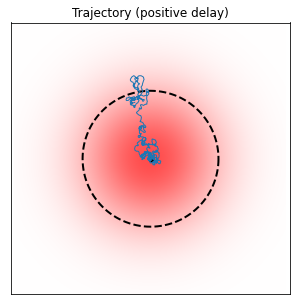

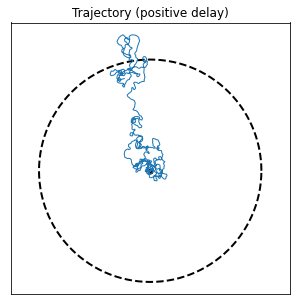

In [10]:
# Plot intensity profile and trajectory.
plt.figure(figsize=(5, 5))
plt.imshow(I_profile)  # Plot intensity profile.
# Plot a reference circle with radius r0.
plt.plot(Lx / 2 + r0 * ratio * np.cos(2 * np.pi * np.arange(361) / 360),
        Ly / 2 + r0 * ratio * np.sin(2 * np.pi * np.arange(361) / 360),
        '--', color='k', linewidth=2)
# Plot a reference point in the origin.
plt.plot(Lx / 2, Ly / 2, '.', color='k', markersize=10)
# Plot the trajectory properly rescaled and shifted.
plt.plot(xp * ratio + Lx / 2, - yp * ratio + Ly / 2, '-', linewidth=1 ) 
plt.title('Trajectory (positive delay)')
plt.axis('equal')
plt.xticks([]) 
plt.yticks([]) 
plt.show()       


# Plot trajectory.
plt.figure(figsize=(5, 5))
# Plot a reference circle with radius r0.
plt.plot(r0 * np.cos(2 * np.pi * np.arange(361) / 360),
        r0 * np.sin(2 * np.pi * np.arange(361) / 360),
        '--', color='k', linewidth=2)
# Plot a reference point in the origin.
plt.plot(0, 0, '.', color='k', markersize=10)
# Plot the trajectory.
plt.plot(xp, yp, '-', linewidth=1 ) 
plt.title('Trajectory (positive delay)')
plt.axis('equal')
plt.xticks([]) 
plt.yticks([]) 
plt.show()       


### Negative delay

Let's investigate the case of a negative delay.

We start by simulating the behaviour in the presence of a negative delay $\delta$:

$$
    v(t, \delta) = v(I(t + \delta)) 
$$

In the specific:

$$
  I(t + \delta) = I(t) + \delta\, \frac{{\rm d} I}{{\rm d} t}  
$$

To infer the quantity $\frac{{\rm d} I}{{\rm d} t}$ in the finite difference simulation, we use a linear fit of the last $n_{\rm fit}$ known values of $I$

Function implementing the light-sentitive robot in a Gaussian light intensity zone with **delay** $\delta$.

We will always measure $\delta$ in unit of $\tau$ (time scale of reorientation). 

When simulating with finite differences, we will also express the delay $\delta$ in terms of finite timesteps $\Delta t$.

In [13]:
def evolution_GI_negdelay(x0, y0, phi0, v_inf, v0, Ic, I0, r0, tau, dt, duration, delta):
    """
    Function to generate the trajectory of a light-sensitive robot in a Gaussian
    light intensity zone with positive delay.
    
    Parameters
    ==========
    x0, y0 : Initial position [m].
    phi0 : Initial orientation [rad].
    v_inf : Self-propulsion speed at I=0 [m/s]
    v0 : Self-propulsion speed at I=I0 [m/s]
    Ic : Intensity scale over which the speed decays.
    I0 : Maximum intensity.
    r0 : Standard deviation of the Gaussian intensity.
    tau : Time scale of the rotational diffusion coefficient [s]
    dt : Time step for the numerical solution [s].
    duration : Total time for which the solution is computed [s].
    delta : Positive delay [s].
    """
        
    # Coefficients for the finite difference solution.
    c_noise_phi = np.sqrt(2 / tau * dt)

    N = math.ceil(duration / dt)  # Number of time steps.

    x = np.zeros(N)
    y = np.zeros(N)
    phi = np.zeros(N)
    
    # Negative delay.
    n_fit = 5 
    I_fit = np.zeros(n_fit)
    t_fit = np.arange(n_fit) * dt

    # Perform the simulation.
    rn = np.random.normal(0, 1, N - 1)
    
    x[0] = x0
    y[0] = y0
    phi[0] = phi0
    I_ref = I0 * np.exp(- (x0 ** 2 + y0 ** 2) / r0 ** 2)
    I_fit += I_ref
    
        
    # Estimate the derivative of I linear using the last n_fit values.
    for i in range(N - 1):
        # Current I. 
        I_current = I0 * np.exp(- (x[i] ** 2 + y[i] ** 2) / r0 ** 2)
        # Update I_fit.
        I_fit = np.roll(I_fit, -1)
        I_fit[-1] = I_current
        # Fit to determine the slope.
        p = np.polyfit(t_fit, I_fit, 1)
        dI_dt = p[0]
        # Determine forecast. Remember that here delta is negative.
        I = I_current - delta * dI_dt  
        if I < 0:
            I = 0           
        
        # Update position.
        v = v_inf + (v0 - v_inf) * np.exp(- I / Ic) 
        x[i + 1] = x[i] + v * dt * np.cos(phi[i])
        y[i + 1] = y[i] + v * dt * np.sin(phi[i])
        phi[i + 1] = phi[i] + c_noise_phi * rn[i]

    return x, y, phi

Let's simulate for negative delay.

In [16]:
delta = - 5 * tau  # Negative delay [s].

xn, yn, phin = evolution_GI_negdelay(x0, y0, phi0, v_inf, v0, Ic, I0, r0, tau, dt, 
                                  duration, delta)

t = dt * np.arange(math.ceil(duration / dt))

Plot the trajectories.

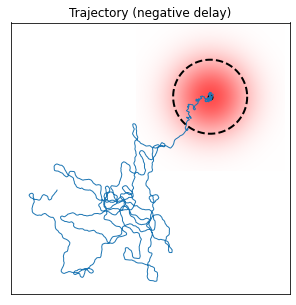

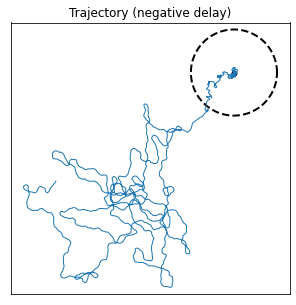

In [17]:
# Plot intensity profile and trajectory.
plt.figure(figsize=(5, 5))
plt.imshow(I_profile)  # Plot intensity profile.
# Plot a reference circle with radius r0.
plt.plot(Lx / 2 + r0 * ratio * np.cos(2 * np.pi * np.arange(361) / 360),
        Ly / 2 + r0 * ratio * np.sin(2 * np.pi * np.arange(361) / 360),
        '--', color='k', linewidth=2)
# Plot a reference point in the origin.
plt.plot(Lx / 2, Ly / 2, '.', color='k', markersize=10)
# Plot the trajectory properly rescaled and shifted.
plt.plot(xn * ratio + Lx / 2, - yn * ratio + Ly / 2, '-', linewidth=1 ) 
plt.title('Trajectory (negative delay)')
plt.axis('equal')
plt.xticks([]) 
plt.yticks([]) 
plt.show()       

# Plot intensity profile and trajectory.
plt.figure(figsize=(5, 5))
# Plot a reference circle with radius r0.
plt.plot(r0 * np.cos(2 * np.pi * np.arange(361) / 360),
        r0 * np.sin(2 * np.pi * np.arange(361) / 360),
        '--', color='k', linewidth=2)
# Plot a reference point in the origin.
plt.plot(0, 0, '.', color='k', markersize=10)
# Plot the trajectory.
plt.plot(xn, yn, '-', linewidth=1 ) 
plt.title('Trajectory (negative delay)')
plt.axis('equal')
plt.xticks([]) 
plt.yticks([]) 
plt.show()       

## Robots in a circular well

Radius of the circular wells: $R$

Simulation with no delay, positive delay, negative delay.

**Reflecting the position inside the circle**

When $x$, $y$ is such that $R < \sqrt{x^2 + y^2}$ we set:

$$
    x_{\rm refl} = x \frac{r}{\sqrt{x^2 + y^2}} 
    \, \, \, \, \, \, \, \, \, 
    y_{\rm refl} = y \frac{r}{\sqrt{x^2 + y^2}} 
$$


### Circular well, Gaussian light intensity, no delay.

Light-sensitive robot in a circular well with radius R.

No delay case.

In [18]:
def circ_well_nodelay(x0, y0, phi0, v_inf, v0, Ic, I0, r0, tau, dt, duration, R):
    """
    Function to generate the trajectory of a light-sensitive robot in a Gaussian
    light intensity zone.
    
    Parameters
    ==========
    x0, y0 : Initial position [m].
    phi0 : Initial orientation [rad].
    v_inf : Self-propulsion speed at I=0 [m/s]
    v0 : Self-propulsion speed at I=I0 [m/s]
    Ic : Intensity scale over which the speed decays.
    I0 : Maximum intensity.
    r0 : Standard deviation of the Gaussian intensity.
    tau : Time scale of the rotational diffusion coefficient [s]
    dt : Time step for the numerical solution [s].
    duration : Total time for which the solution is computed [s].
    R : Radius of the circular well.
    """
        
    # Coefficients for the finite difference solution.
    c_noise_phi = np.sqrt(2 / tau * dt)

    N = math.ceil(duration / dt)  # Number of time steps.

    x = np.zeros(N)
    y = np.zeros(N)
    r = np.zeros(N)
    phi = np.zeros(N)

    rn = np.random.normal(0, 1, N - 1)
    
    x[0] = x0
    y[0] = y0
    r[0] = np.sqrt(x0 ** 2 + y0 ** 2) 
    phi[0] = phi0

    for i in range(N - 1):
        I =  I0 * np.exp(- (x[i] ** 2 + y[i] ** 2) / r0 ** 2)
        v = v_inf + (v0 - v_inf) * np.exp(- I / Ic) 
        x[i + 1] = x[i] + v * dt * np.cos(phi[i])
        y[i + 1] = y[i] + v * dt * np.sin(phi[i])
        phi[i + 1] = phi[i] + c_noise_phi * rn[i]
        r[i + 1] = np.sqrt(x[i + 1] ** 2 + y[i + 1] ** 2) 
        if r[i + 1] > R:
            x[i + 1] = x[i + 1] / r[i + 1] * R
            y[i + 1] = y[i + 1] / r[i + 1] * R
            r[i + 1] = R

    return x, y, phi

### Circular well, Gaussian light intensity, positive delay.

Light-sensitive robot in a circular well with radius R.

Positive delay case.

In [19]:
def circ_well_posdelay(x0, y0, phi0, v_inf, v0, Ic, I0, r0, tau, dt, duration, delta, R):
    """
    Function to generate the trajectory of a light-sensitive robot in a Gaussian
    light intensity zone with positive delay.
    
    Parameters
    ==========
    x0, y0 : Initial position [m].
    phi0 : Initial orientation [rad].
    v_inf : Self-propulsion speed at I=0 [m/s]
    v0 : Self-propulsion speed at I=I0 [m/s]
    Ic : Intensity scale over which the speed decays.
    I0 : Maximum intensity.
    r0 : Standard deviation of the Gaussian intensity.
    tau : Time scale of the rotational diffusion coefficient [s]
    dt : Time step for the numerical solution [s].
    duration : Total time for which the solution is computed [s].
    delta : Positive delay [s].
    R : Radius of the circular well.
    """
        
    # Coefficients for the finite difference solution.
    c_noise_phi = np.sqrt(2 / tau * dt)

    N = math.ceil(duration / dt)  # Number of time steps.

    x = np.zeros(N)
    y = np.zeros(N)
    phi = np.zeros(N)
    r = np.zeros(N)
    
    n_delay = int(delta / dt)  # Delay in units of time steps.

    rn = np.random.normal(0, 1, N - 1)
    
    x[0] = x0
    y[0] = y0
    phi[0] = phi0
    r[0] = np.sqrt(x0 ** 2 + y0 ** 2) 
    I_ref = I0 * np.exp(- (x0 ** 2 + y0 ** 2) / r0 ** 2)

    for i in range(N - 1):
        if i < n_delay:
            I = I_ref
        else:
            I = I0 * np.exp(- (x[i - n_delay] ** 2 + y[i - n_delay] ** 2) / r0 ** 2)
        
        v = v_inf + (v0 - v_inf) * np.exp(- I / Ic) 
        x[i + 1] = x[i] + v * dt * np.cos(phi[i])
        y[i + 1] = y[i] + v * dt * np.sin(phi[i])
        phi[i + 1] = phi[i] + c_noise_phi * rn[i]
        r[i + 1] = np.sqrt(x[i + 1] ** 2 + y[i + 1] ** 2) 
        if r[i + 1] > R:
            x[i + 1] = x[i + 1] / r[i + 1] * R
            y[i + 1] = y[i + 1] / r[i + 1] * R
            r[i + 1] = R

    return x, y, phi

### Circular well, Gaussian light intensity, negative delay.

Light-sensitive robot in a circular well with radius R.

Negative delay case.

In [20]:
def circ_well_negdelay(x0, y0, phi0, v_inf, v0, Ic, I0, r0, tau, dt, duration, delta, R):
    """
    Function to generate the trajectory of a light-sensitive robot in a Gaussian
    light intensity zone with positive delay.
    
    Parameters
    ==========
    x0, y0 : Initial position [m].
    phi0 : Initial orientation [rad].
    v_inf : Self-propulsion speed at I=0 [m/s]
    v0 : Self-propulsion speed at I=I0 [m/s]
    Ic : Intensity scale over which the speed decays.
    I0 : Maximum intensity.
    r0 : Standard deviation of the Gaussian intensity.
    tau : Time scale of the rotational diffusion coefficient [s]
    dt : Time step for the numerical solution [s].
    duration : Total time for which the solution is computed [s].
    delta : Positive delay [s].
    R : Radius of the circular well.
    """
        
    # Coefficients for the finite difference solution.
    c_noise_phi = np.sqrt(2 / tau * dt)

    N = math.ceil(duration / dt)  # Number of time steps.

    x = np.zeros(N)
    y = np.zeros(N)
    phi = np.zeros(N)
    r = np.zeros(N)
    
    # Negative delay.
    n_fit = 5 
    I_fit = np.zeros(n_fit)
    t_fit = np.arange(n_fit) * dt

    # Perform the simulation.
    rn = np.random.normal(0, 1, N - 1)
    
    x[0] = x0
    y[0] = y0
    r[0] = np.sqrt(x0 ** 2 + y0 ** 2) 
    phi[0] = phi0
    I_ref = I0 * np.exp(- (x0 ** 2 + y0 ** 2) / r0 ** 2)
    I_fit += I_ref
    
        
    # Estimate the derivative of I linear using the last n_fit values.
    for i in range(N - 1):
        # Current I. 
        I_current = I0 * np.exp(- (x[i] ** 2 + y[i] ** 2) / r0 ** 2)
        # Update I_fit.
        I_fit = np.roll(I_fit, -1)
        I_fit[-1] = I_current
        # Fit to determine the slope.
        p = np.polyfit(t_fit, I_fit, 1)
        dI_dt = p[0]
        # Determine forecast. Remember that here delta is negative.
        I = I_current - delta * dI_dt  
        if I < 0:
            I = 0           
        
        # Update position.
        v = v_inf + (v0 - v_inf) * np.exp(- I / Ic) 
        x[i + 1] = x[i] + v * dt * np.cos(phi[i])
        y[i + 1] = y[i] + v * dt * np.sin(phi[i])
        phi[i + 1] = phi[i] + c_noise_phi * rn[i]
        r[i + 1] = np.sqrt(x[i + 1] ** 2 + y[i + 1] ** 2) 
        if r[i + 1] > R:
            x[i + 1] = x[i + 1] / r[i + 1] * R
            y[i + 1] = y[i + 1] / r[i + 1] * R
            r[i + 1] = R

    return x, y, phi

Simulate trajectories.

In [23]:
R = 2 * r0
dt = 0.1
duration = 600

x0 = r0
y0 = r0
phi0 = 0

xw, yw, phiw = circ_well_nodelay(x0, y0, phi0, v_inf, v0, Ic, I0, r0, tau, dt, duration, R)

delta = 5 * tau  # Delay [s].
xwp, ywp, phiwp = circ_well_posdelay(x0, y0, phi0, v_inf, v0, Ic, I0, r0, tau, dt, duration, delta, R)

delta = - 5 * tau  # Delay [s].
xwn, ywn, phiwn = circ_well_negdelay(x0, y0, phi0, v_inf, v0, Ic, I0, r0, tau, dt, duration, delta, R)
   

Plot the trajectories.

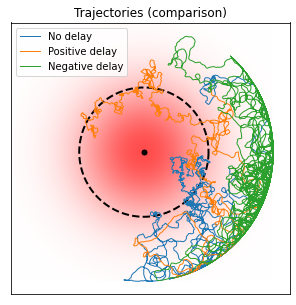

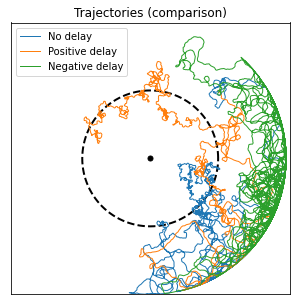

In [24]:
# Plot intensity profile and trajectory.
plt.figure(figsize=(5, 5))
plt.imshow(I_profile)  # Plot intensity profile.
# Plot a reference circle with radius r0.
plt.plot(Lx / 2 + r0 * ratio * np.cos(2 * np.pi * np.arange(361) / 360),
        Ly / 2 + r0 * ratio * np.sin(2 * np.pi * np.arange(361) / 360),
        '--', color='k', linewidth=2)
# Plot a reference point in the origin.
plt.plot(Lx / 2, Ly / 2, '.', color='k', markersize=10)
# Plot the trajectory properly rescaled and shifted.
plt.plot(xw * ratio + Lx / 2, - yw * ratio + Ly / 2, '-', linewidth=1,
        label='No delay') 
plt.plot(xwp * ratio + Lx / 2, - ywp * ratio + Ly / 2, '-', linewidth=1,
        label='Positive delay') 
plt.plot(xwn * ratio + Lx / 2, - ywn * ratio + Ly / 2, '-', linewidth=1,
        label='Negative delay') 
plt.title('Trajectories (comparison)')
plt.axis('equal')
plt.legend()
plt.xticks([]) 
plt.yticks([]) 
plt.show()       

# Plot intensity profile and trajectory.
plt.figure(figsize=(5, 5))
# Plot a reference circle with radius r0.
plt.plot(r0 * np.cos(2 * np.pi * np.arange(361) / 360),
        r0 * np.sin(2 * np.pi * np.arange(361) / 360),
        '--', color='k', linewidth=2)
# Plot a reference point in the origin.
plt.plot(0, 0, '.', color='k', markersize=10)
# Plot the trajectory.
plt.plot(xw, yw, '-', linewidth=1, label='No delay') 
plt.plot(xwp, ywp, '-', linewidth=1, label='Positive delay') 
plt.plot(xwn, ywn, '-', linewidth=1, label='Negative delay') 
plt.title('Trajectories (comparison)')
plt.axis('equal')
plt.legend()
plt.xticks([]) 
plt.yticks([]) 
plt.xlim([- 2 * r0, 2 * r0]) 
plt.ylim([- 2 * r0, 2 * r0]) 
plt.show()       

## Multiple robots with sensory delay

Each light-sensitive robot generates a Gaussian light intensity zone around its position.

Each robots then contributes to generate an intensity field that depends on the position of the robots. Each robot measures the total field and reacts accordingly. 

We will simulate the behaviour in the case of no delay, positive delay, and negative delay.

**Arena**: square $L \times L$ (same as in the Vicsek model).

We use *periodic boundary conditions*.

In [25]:
def replicas(x, y, L):
    """
    Function to generate replicas of a single particle.
    
    Parameters
    ==========
    x, y : Position.
    L : Side of the squared arena.
    """    
    xr = np.zeros(9)
    yr = np.zeros(9)

    for i in range(3):
        for j in range(3):
            xr[3 * i + j] = x + (j - 1) * L
            yr[3 * i + j] = y + (i - 1) * L
    
    return xr, yr

In [26]:
def pbc(x, y, L):
    """
    Function to enforce periodic boundary conditions on the positions.
    
    Parameters
    ==========
    x, y : Position.
    L : Side of the squared arena.
    """   
    
    outside_left = np.where(x < - L / 2)[0]
    x[outside_left] = x[outside_left] + L

    outside_right = np.where(x > L / 2)[0]
    x[outside_right] = x[outside_right] - L

    outside_up = np.where(y > L / 2)[0]
    y[outside_up] = y[outside_up] - L

    outside_down = np.where(y < - L / 2)[0]
    y[outside_down] = y[outside_down] + L
    
    return x, y

In [27]:
from functools import reduce

def calculate_intensity(x, y, I0, r0, L, r_c):
    """
    Function to calculate the intensity seen by each particle.
    
    Parameters
    ==========
    x, y : Positions.
    r0 : Standard deviation of the Gaussian light intensity zone.
    I0 : Maximum intensity of the Gaussian.
    L : Dimension of the squared arena.
    r_c : Cut-off radius. Pre-set it around 3 * r0. 
    """
    
    N = np.size(x)

    I_particle = np.zeros(N)  # Intensity seen by each particle.
    
    # Preselect what particles are closer than r_c to the boundaries.
    replicas_needed = reduce( 
        np.union1d, (
            np.where(y + r_c > L / 2)[0], 
            np.where(y - r_c < - L / 2)[0],
            np.where(x + r_c > L / 2)[0],
            np.where(x - r_c < - L / 2)[0]
        )
    )

    for j in range(N - 1):   
        
        # Check if replicas are needed to find the interacting neighbours.
        if np.size(np.where(replicas_needed == j)[0]):
            # Use replicas.
            xr, yr = replicas(x[j], y[j], L)
            for nr in range(9):
                dist2 = (x[j + 1:] - xr[nr]) ** 2 + (y[j + 1:] - yr[nr]) ** 2 
                nn = np.where(dist2 <= r_c ** 2)[0] + j + 1
                
                # The list of nearest neighbours is set.
                # Contains only the particles with index > j
        
                if np.size(nn) > 0:
                    nn = nn.astype(int)
        
                    # Find total intensity
                    dx = x[nn] - xr[nr]
                    dy = y[nn] - yr[nr]
                    d2 = dx ** 2 + dy ** 2
                    I = I0 * np.exp(- d2 / r0 ** 2)
                    
                    # Contribution for particle j.
                    I_particle[j] += np.sum(I)

                    # Contribution for nn of particle j nr replica.
                    I_particle[nn] += I
                
        else:
            dist2 = (x[j + 1:] - x[j]) ** 2 + (y[j + 1:] - y[j]) ** 2 
            nn = np.where(dist2 <= r_c ** 2)[0] + j + 1
        
            # The list of nearest neighbours is set.
            # Contains only the particles with index > j
        
            if np.size(nn) > 0:
                nn = nn.astype(int)
        
                # Find interaction
                dx = x[nn] - x[j]
                dy = y[nn] - y[j]
                d2 = dx ** 2 + dy ** 2
                I = I0 * np.exp(- d2 / r0 ** 2)
                
                # Contribution for particle j.
                I_particle[j] += np.sum(I)

                # Contribution for nn of particle j.
                I_particle[nn] += I
                   
    return I_particle


### Simulation: multiple robots 

Initialization of the system.

We demontrate the effect of the delay on the behaviour of an ensemble of robots. 

*Note: how the delay affects the collective behaviour of the ensemble is already visible with 3-4 robots. Here we use 5 robots for convenience. More robots can be used as well.*

In [36]:
N_part = 50  # Number of light-sensitive robots. 
# Note: 5 is enough to demonstrate clustering - dispersal. 

tau = 1  # Timescale of the orientation diffusion.
dt = 0.05  # Time step [s].

v0 = 0.1  # Self-propulsion speed at I=0 [m/s].
v_inf = 0.01  # Self-propulsion speed at I=+infty [m/s].
Ic = 0.1  # Intensity scale where the speed decays.
I0 = 1  # Maximum intensity.
r0 = 0.3  # Standard deviation of the Gaussian light intensity zone [m].

delta = 0  # No delay. Tends to cluster.
delta = 5 * tau  # Positive delay. More stable clustering.
# delta = - 5 * tau  # Negative delay. Dispersal.

r_c = 4 * r0  # Cut-off radius [m].
L = 50 * r0  # Side of the arena[m].

# Initialization.

# Random position.
x = (np.random.rand(N_part) - 0.5) * L  # in [-L/2, L/2]
y = (np.random.rand(N_part) - 0.5) * L  # in [-L/2, L/2]

# Random orientation.
phi = 2 * (np.random.rand(N_part) - 0.5) * np.pi  # in [-pi, pi]

# Coefficients for the finite difference solution.
c_noise_phi = np.sqrt(2 * dt / tau)

I_ref = calculate_intensity(x, y, I0, r0, L, r_c)

if delta < 0:
    # Negative delay.
    n_fit = int(- delta / dt)  # Delay in units of time steps.
    I_fit = np.zeros([n_fit, N_part])
    t_fit = np.arange(n_fit) * dt
    dI_dt = np.zeros(N_part)
    # Initialize.
    for i in range(n_fit):
        I_fit[i, :] += I_ref   
        
if delta > 0:
    # Positive delay.
    n_delay = int(delta / dt)  # Delay in units of time steps.
    I_memory = np.zeros([n_delay, N_part])
    # Initialize.
    for i in range(n_delay):
        I_memory[i, :] += I_ref   
        
    

Simulation (animated) 

In [37]:
import time
from scipy.constants import Boltzmann as kB 
from tkinter import *

window_size = 600

rp = r0 / 3
vp = rp  # Length of the arrow indicating the velocity direction.
line_width = 1  # Width of the arrow line.

N_skip = 50

tk = Tk()
tk.geometry(f'{window_size + 20}x{window_size + 20}')
tk.configure(background='#000000')

canvas = Canvas(tk, background='#ECECEC')  # Generate animation window 
tk.attributes('-topmost', 0)
canvas.place(x=10, y=10, height=window_size, width=window_size)

light_spots = []
for j in range(N_part):
    light_spots.append(
        canvas.create_oval(
            (x[j] - r0) / L * window_size + window_size / 2, 
            (y[j] - r0) / L * window_size + window_size / 2,
            (x[j] + r0) / L * window_size + window_size / 2, 
            (y[j] + r0) / L * window_size + window_size / 2,
            outline='#FF8080', 
        )
    )
    
particles = []
for j in range(N_part):
    particles.append(
        canvas.create_oval(
            (x[j] - rp) / L * window_size + window_size / 2, 
            (y[j] - rp) / L * window_size + window_size / 2,
            (x[j] + rp) / L * window_size + window_size / 2, 
            (y[j] + rp) / L * window_size + window_size / 2,
            outline='#000000', 
            fill='#A0A0A0',
        )
    )

velocities = []
for j in range(N_part):
    velocities.append(
        canvas.create_line(
            x[j] / L * window_size + window_size / 2, 
            y[j] / L * window_size + window_size / 2,
            (x[j] + vp * np.cos(phi[j])) / L * window_size + window_size / 2, 
            (y[j] + vp * np.cos(phi[j])) / L * window_size + window_size / 2,
            width=line_width, 
        )
    )

step = 0

def stop_loop(event):
    global running
    running = False
tk.bind("<Escape>", stop_loop)  # Bind the Escape key to stop the loop.
running = True  # Flag to control the loop.
while running:
    
    # Calculate current I.
    I_particles = calculate_intensity(x, y, I0, r0, L, r_c)
    
    if delta < 0:
        # Estimate the derivative of I linear using the last n_fit values.
        # Update I_fit.
        I_fit = np.roll(I_fit, -1, axis=0)
        I_fit[-1, :] = I_particles
        # Fit to determine the slope.
        for j in range(N_part):
            p = np.polyfit(t_fit, I_fit[:, j], 1)
            dI_dt[j] = p[0]
        # Determine forecast. Remember that here delta is negative.
        I = I_particles - delta * dI_dt  
        I[np.where(I < 0)[0]] = 0
    elif delta > 0:
        # Update I_memory.
        I_memory = np.roll(I_memory, -1, axis=0)
        I_memory[-1, :] = I_particles    
        I = I_memory[0, :]
    else:
        I = I_particles
       
    # Calculate new positions and orientations. 
    v = v_inf + (v0 - v_inf) * np.exp(- I / Ic) 
    nx = x + v * dt * np.cos(phi)
    ny = y + v * dt * np.sin(phi)
    nphi = phi + c_noise_phi * np.random.normal(0, 1, N_part)


    # Apply pbc.
    nx, ny = pbc(nx, ny, L)
                
    # Update animation frame.
    if step % N_skip == 0:        
                    
        for j, light_spot in enumerate(light_spots):
            canvas.coords(
                light_spot,
                (nx[j] - r0) / L * window_size + window_size / 2,
                (ny[j] - r0) / L * window_size + window_size / 2,
                (nx[j] + r0) / L * window_size + window_size / 2,
                (ny[j] + r0) / L * window_size + window_size / 2,
            )
                    
        for j, particle in enumerate(particles):
            canvas.coords(
                particle,
                (nx[j] - rp) / L * window_size + window_size / 2,
                (ny[j] - rp) / L * window_size + window_size / 2,
                (nx[j] + rp) / L * window_size + window_size / 2,
                (ny[j] + rp) / L * window_size + window_size / 2,
            )

        for j, velocity in enumerate(velocities):
            canvas.coords(
                velocity,
                nx[j] / L * window_size + window_size / 2,
                ny[j] / L * window_size + window_size / 2,
                (nx[j] + vp * np.cos(nphi[j])) / L * window_size + window_size / 2,
                (ny[j] + vp * np.sin(nphi[j])) / L * window_size + window_size / 2,
            )
                    
        tk.title(f'Time {step * dt:.1f} - Iteration {step}')
        tk.update_idletasks()
        tk.update()
        time.sleep(.001)  # Increase to slow down the simulation.    

    step += 1
    x[:] = nx[:]
    y[:] = ny[:]
    phi[:] = nphi[:]  

tk.update_idletasks()
tk.update()
tk.mainloop()  # Release animation handle (close window to finish).